# Project：Visualize Palmer Archipelago penguin data.

## Analysis Objectives

Visualize relevant variables of penguin samples from the Palmer Archipelago to explore and analyze relationships between factors such as species, gender, island location, and penguin physical attributes including body mass, culmen length and depth, and flipper length.

## Introduction

The raw data `Penguins.csv` includes 334 samples of penguins collected from three islands in the Palmer Archipelago, Antarctica, along with associated attributes such as species, island location, culmen length, culmen depth, flipper length, body mass, and sex of the penguins.  
Penguins.csv column meanings are as follows:
- species：Penguin species
- island：Island where the penguin is located
- culmen_length_mm：Length of the penguin's culmen (in millimeters)
- culmen_depth_mm：Depth of the penguin's culmen (in millimeters)
- flipper_length_mm：Length of the penguin's flipper (in millimeters)
- body_mass_g：Penguin body weight (in grams)
- sex：Penguin gender

## Read the Data

Import the necessary libraries for data analysis and use Pandas' `read_csv` function to parse the contents of the raw data file `Penguins.csv`into a DataFrame assigned to the variable `original_data`. 

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
original_data = pd.read_csv("Penguins.csv")
original_data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


## Data Evaluation and Cleaning

The step will focus on two main aspects: structure and content, addressing tidiness and cleanliness.  
Structural issues pertain to data that does not adhere to the principles of "each variable as a column, each observation as a row, and each type of observational unit forms a table."  
Content issues include missing data, duplicate data, invalid data, and other data quality concerns.

To distinguish between cleaned and original data, we will create a new variable `cleaned_data`, which will be a copy of `original_data`. Subsequent cleaning steps will be applied to `cleaned_data`.

In [18]:
cleaned_data = original_data.copy()

### Data Tidiness

In [19]:
cleaned_data.head(10)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,MALE
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


From examining the first 10 rows of the data, the data conforms to the principle of "each variable as a column, each observation as a row, and each type of observational unit as a table," thus there are no structural issues.

### Data Cleanliness

Use the `info` method to get a general understanding of the data content.

In [20]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


It can be seen that the `cleaned_data` contains a total of 344 observations. The variables `culmen_length_mm`、`culmen_depth_mm`、`flipper_length_mm`、`body_mass_g` have missing values, which will be assessed and cleaned in subsequent steps.
In terms of data types, we know that species (penguin species), sex (penguin gender), and island (penguin location) are categorical data. Therefore, we can convert the data types of these variables to Category.

In [21]:
cleaned_data['species'] = cleaned_data['species'].astype("category")
cleaned_data['sex'] = cleaned_data['sex'].astype("category") 
cleaned_data['island'] = cleaned_data['island'].astype("category")

In [22]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            344 non-null    category
 1   island             344 non-null    category
 2   culmen_length_mm   342 non-null    float64 
 3   culmen_depth_mm    342 non-null    float64 
 4   flipper_length_mm  342 non-null    float64 
 5   body_mass_g        342 non-null    float64 
 6   sex                334 non-null    category
dtypes: category(3), float64(4)
memory usage: 12.3 KB


#### Handling Missing Data

The variables `culmen_length_mm`、`culmen_depth_mm`、`flipper_length_mm`、`body_mass_g` have missing values.  
First, extract the observations with missing values for these variables to examine them.

In [23]:
cleaned_data.query("culmen_length_mm.isna()")

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [24]:
cleaned_data.query("culmen_depth_mm.isnull()")

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [25]:
cleaned_data.query("flipper_length_mm.isna()")

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [26]:
cleaned_data.query("body_mass_g.isna()")

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


It can be seen that the observations with indexes 3 and 339 are null for all variables except species and island, and do not provide value for exploring the factors associated with penguin physical attributes, so these two rows can simply be deleted.

In [27]:
cleaned_data.drop([3,339], inplace=True)
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 342 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            342 non-null    category
 1   island             342 non-null    category
 2   culmen_length_mm   342 non-null    float64 
 3   culmen_depth_mm    342 non-null    float64 
 4   flipper_length_mm  342 non-null    float64 
 5   body_mass_g        342 non-null    float64 
 6   sex                334 non-null    category
dtypes: category(3), float64(4)
memory usage: 14.7 KB


In [28]:
cleaned_data.query("sex.isna()")

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN


Observations with missing gender variables have other data that can still provide value to the analysis. Since Pandas, as well as Matplotlib and Seaborn, automatically ignore missing values, these rows can be retained.

#### Handling Duplicate Data

Based on the meanings and contents of the data variables, since variable duplication is allowed, we do not need to check for duplicate values in this dataset.

#### Handling Inconsistent Data

Inconsistent data may exist across all categorical variables, so we need to check if different values actually refer to the same target.

In [29]:
cleaned_data["species"].value_counts()

species
Adelie       151
Gentoo       123
Chinstrap     68
Name: count, dtype: int64

In [30]:
cleaned_data["island"].value_counts()

island
Biscoe       167
Dream        124
Torgersen     51
Name: count, dtype: int64

In [31]:
cleaned_data["sex"].value_counts()

sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64

There are no inconsistencies in the species and island columns, but there is a dot "." in the sex column that does not represent any valid gender. We should replace this value with `NaN` (missing value).

In [32]:
cleaned_data['sex'] = cleaned_data['sex'].replace(".", np.nan)

Check if the period "." value still exists in the dataset.

In [33]:
cleaned_data["sex"].value_counts()

sex
MALE      168
FEMALE    165
Name: count, dtype: int64

#### Handling Invalid or Erroneous Data

Use the `describe` method of a DataFrame to quickly get statistical information about numerical data.

In [34]:
cleaned_data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


From the above statistical information, there are no unrealistic values present in `cleaned_data`

## Exploring the Data

We will explore and analyze the penguin sample data through data visualization to gain insights from the charts.

In [35]:
sns.set_palette("pastel")

In [36]:
cleaned_data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


### Proportion of Penguin Species

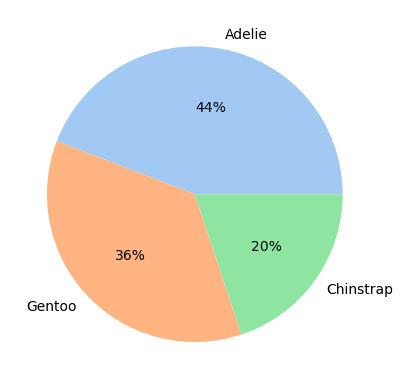

In [40]:
species_count = cleaned_data["species"].value_counts()
plt.pie(species_count, autopct='%.0f%%', labels=species_count.index)
plt.show()

The Adelie species has the largest proportion, the Gentoo species has the second largest proportion, and the Chinstrap species has the smallest proportion, accounting for approximately one-fifth.

### Proportion of Penguins by Island

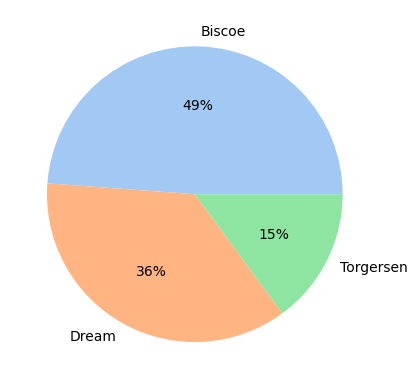

In [41]:
island_count = cleaned_data["island"].value_counts()
plt.pie(island_count, autopct='%.0f%%', labels=island_count.index)
plt.show()

Approximately half of the penguin samples come from `Biscoe` Island, making it the largest proportion. `Dream` Island follows, while the samples from `Torgersen` Island are the fewest.

### Gender Proportion of Penguins

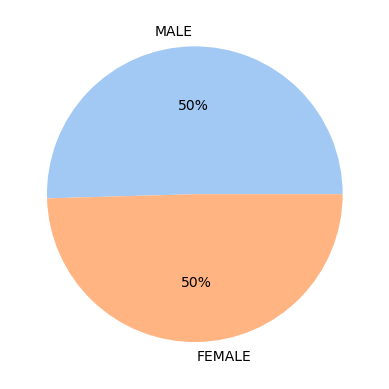

In [42]:
sex_count = cleaned_data['sex'].value_counts()
plt.pie(sex_count, labels=sex_count.index, autopct='%.0f%%')
plt.show()

The gender ratio of the sample penguins is balanced, indicating a random sampling.

### The Number of Penguins of Each Species on Different Islands

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


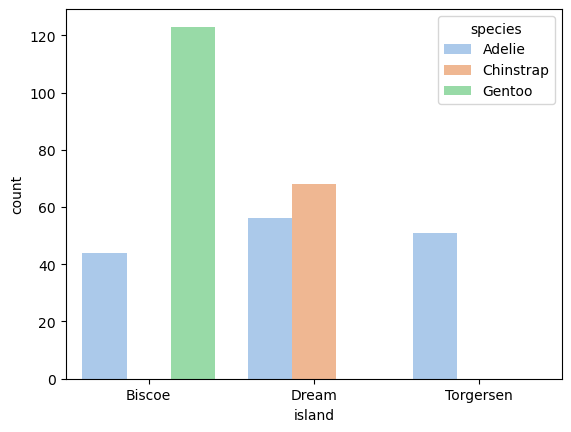

In [43]:
sns.countplot(cleaned_data, x="island", hue="species")
plt.show()

It can be seen that `Adelie` penguins are found on all three islands: `Biscoe`, `Dream`, and `Torgersen`. In contrast, `Chinstrap` penguins are only present on `Dream` Island, and `Gentoo` penguins are exclusively found on `Biscoe` Island.

### Number of Penguins of Each Sex on Different Islands

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


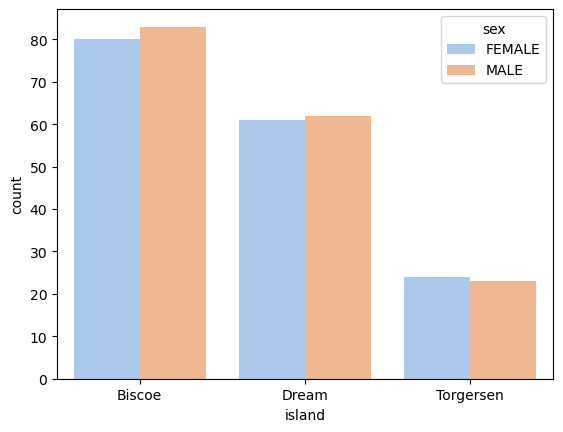

In [44]:
sns.countplot(cleaned_data, x='island', hue='sex')
plt.show()

### Examine the Correlation Between Numerical Variables

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

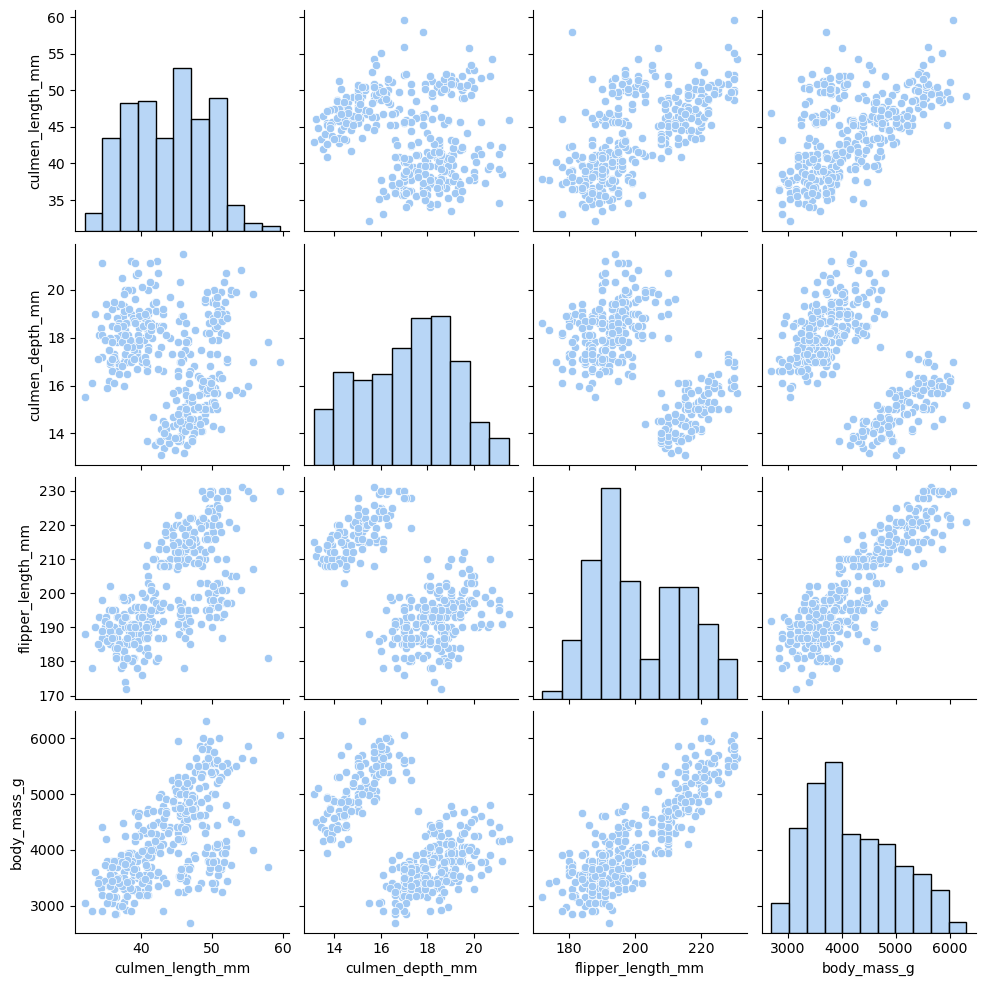

In [45]:
sns.pairplot(cleaned_data)
plt.show()

From the histograms, it is evident that the distributions of culmen length, culmen depth, flipper length, and body mass among the penguin samples are not normally distributed. This suggests two things: first, there may be multiple distinct groups within the samples; second, the sample size might be insufficient.

Additionally, distinct clusters are evident in the scatter plots, which may be associated with factors such as penguin species and gender. Further categorization for comparative analysis can thus be explored.

### Investigating the correlation between variables based on species.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated 

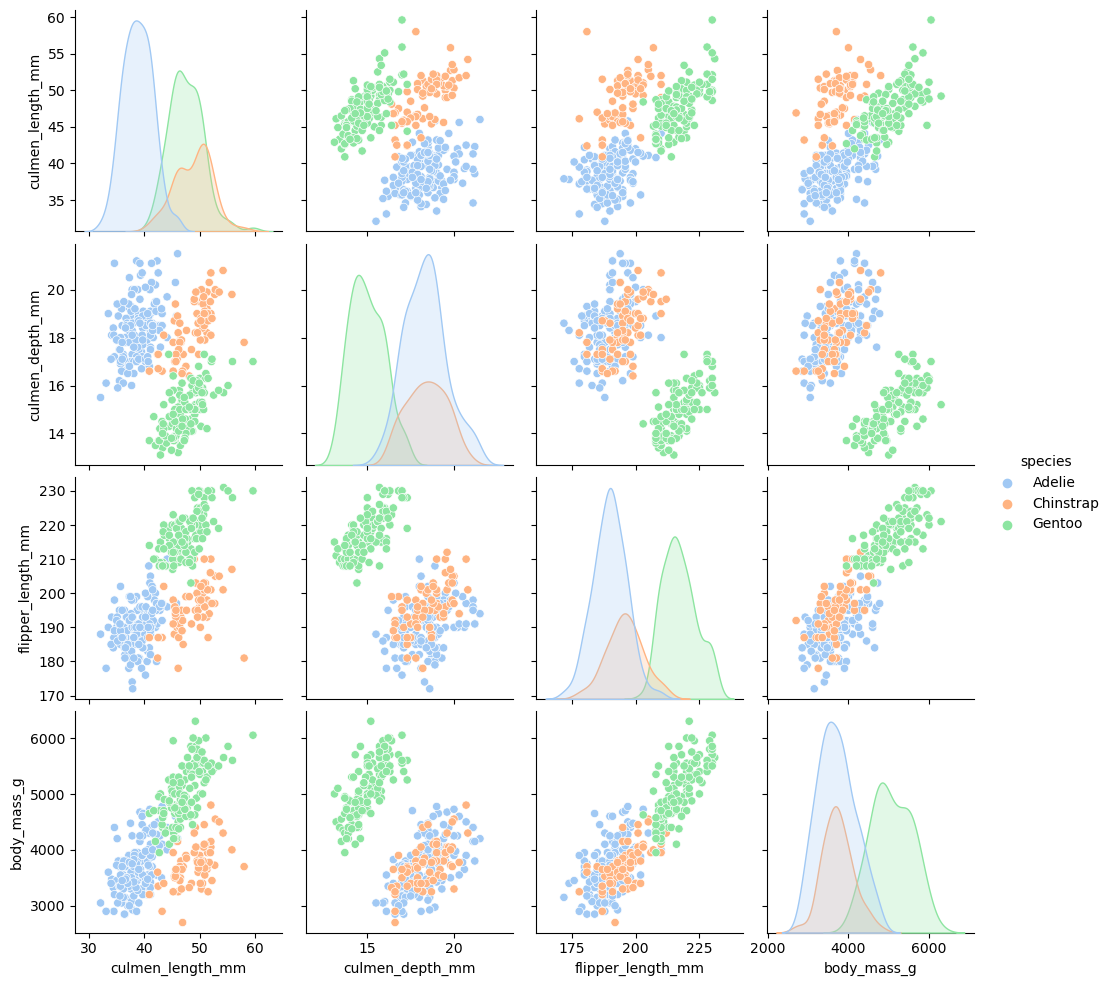

In [46]:
sns.pairplot(cleaned_data, hue='species')
plt.show()

The data of penguin samples of the same species are basically clustered together on the scatter plots, indicating that there are similarities in the relationship between culmen length, culmen depth, flipper length, and body mass among penguins of the same species. These findings are favorable for us to infer penguin species based on the values such as body mass and flipper length, as well as to infer the values like body mass and flipper length based on penguin species.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated 

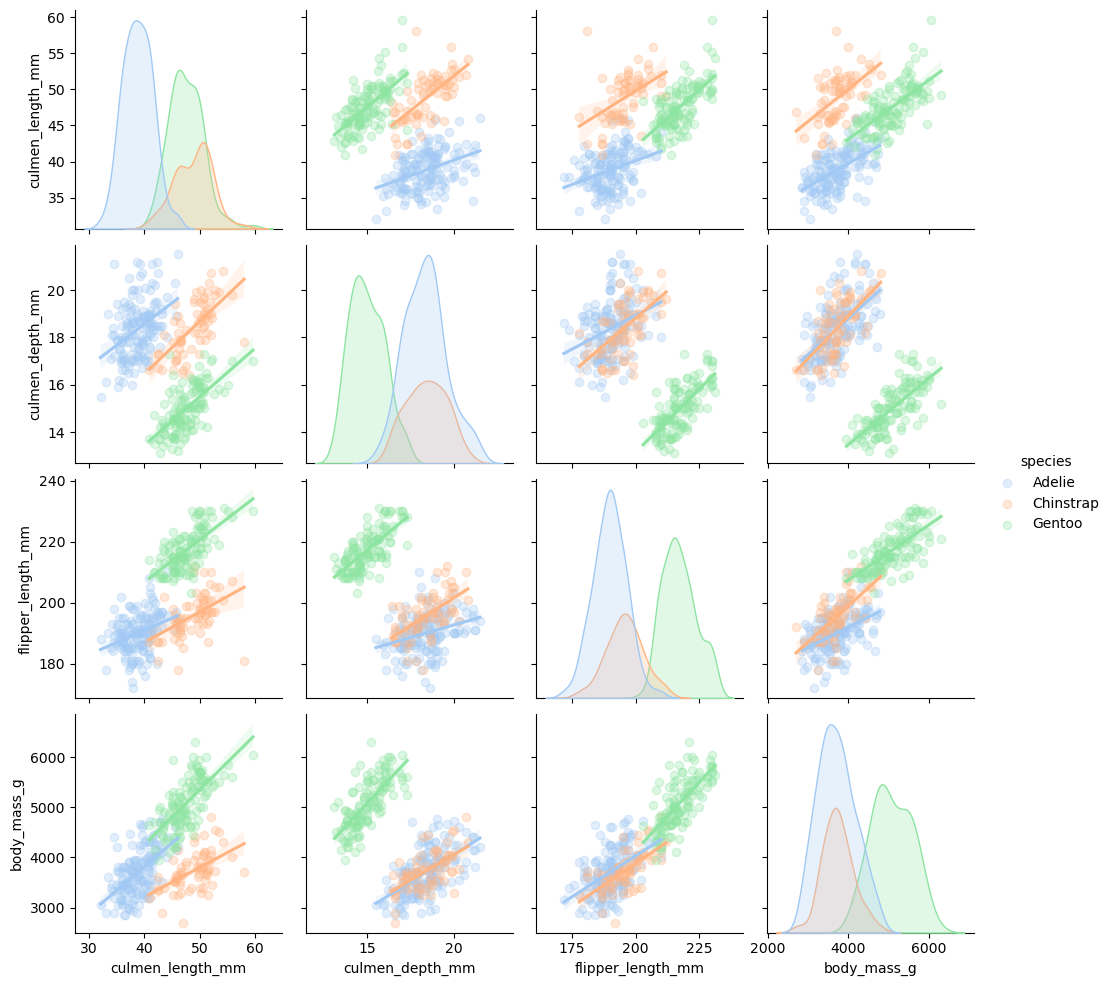

In [47]:
sns.pairplot(cleaned_data, hue='species', kind='reg', plot_kws={'scatter_kws': {'alpha': 0.3}})
plt.show()

The scatter plots with linear regression lines show a positive linear relationship among attributes of penguins of the same species. This means that as the culmen length increases, culmen depth also increases, flipper length increases, and body mass increases. Conversely, as culmen length decreases, culmen depth decreases, flipper length decreases, and body mass decreases.

Based on the density plots, the following observations can be made about the samples:
- Chinstrap and Gentoo penguins have similar ranges of culmen length, while Adelie penguins have shorter culmens.
- Adelie and Chinstrap penguins have similar ranges of culmen depth, while Gentoo penguins have shallower culmens.
- Adelie penguins have the shortest flipper lengths, Chinstrap penguins are intermediate, and Gentoo penguins have the longest flipper lengths.
- Adelie and Chinstrap penguins have similar ranges of body mass, while Gentoo penguins have higher body mass.

However, to determine whether these numerical differences among species are statistically significant, hypothesis testing is necessary.

### Examine the Correlations between Numerical Values based on Gender

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated 

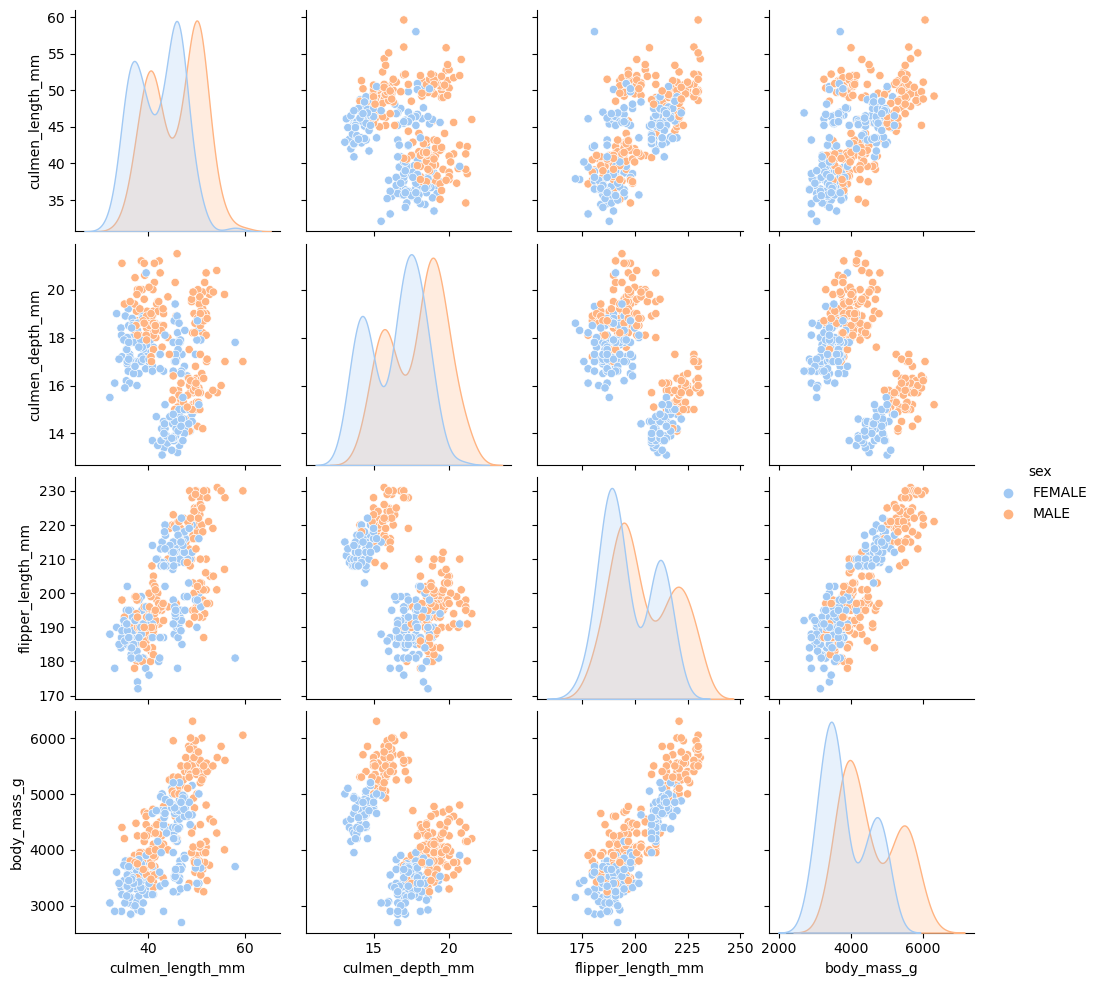

In [48]:
sns.pairplot(cleaned_data, hue='sex')
plt.show()

It can be seen that male penguins in the sample have higher numerical values across various attributes compared to female penguins.